In [ ]:
%pip install matplotlib
%pip install seaborn
%pip install scipy

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


This Colab notebook is associated with Figures 2.1, 4.1, and 4.2 in the respective CDJ Article.

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from scipy.stats import pearsonr, linregress

In [ ]:
bus_service_df = pd.read_csv("Bus_Service_Summary.csv")
grad_rates_df = pd.read_csv("Graduation_Rates_Summary.csv")

In [ ]:
grad_rates_df["Borough"] = grad_rates_df["Borough"].str.upper().str.strip()
bus_service_df["Borough"] = bus_service_df["Borough"].str.upper().str.strip()


In [ ]:
print(grad_rates_df.columns)
print(bus_service_df.columns)

Index(['Borough', 'Avg Graduation Rate (%)', 'Avg Dropout Rate (%)'], dtype='object')
Index(['Borough', '% Door-To-Door Service', '% Stop-To-School Service',
       '% Metrocard Service', '% Mid-Day Service', '% D2D Late-Day Programs',
       '% S2S Late-Day Programs'],
      dtype='object')


In [ ]:
grad_rates_summary = grad_rates_df.groupby("Borough").agg({
    "Avg Graduation Rate (%)": "mean",  # Average graduation rate per borough
    "Avg Dropout Rate (%)": "mean",  # Average dropout rate per borough
}).reset_index()
print(grad_rates_summary)

         Borough  Avg Graduation Rate (%)  Avg Dropout Rate (%)
0          BRONX                74.977480             12.456615
1       BROOKLYN                80.822536              7.880740
2      MANHATTAN                81.292320              8.018955
3         QUEENS                83.608040              6.856949
4  STATEN ISLAND                84.894171              6.299992


In [ ]:
grad_rates_summary.rename(columns={
    "% Grads": "Avg Graduation Rate (%)",
    "% Dropout": "Avg Dropout Rate (%)"
}, inplace=True)

In [ ]:
merged_data = pd.merge(grad_rates_summary, bus_service_df, on="Borough", how="inner")


In [ ]:

print(merged_data.head())
print(merged_data.columns)

         Borough  Avg Graduation Rate (%)  Avg Dropout Rate (%)  \
0          BRONX                74.977480             12.456615   
1       BROOKLYN                80.822536              7.880740   
2      MANHATTAN                81.292320              8.018955   
3         QUEENS                83.608040              6.856949   
4  STATEN ISLAND                84.894171              6.299992   

   % Door-To-Door Service  % Stop-To-School Service  % Metrocard Service  \
0               71.228398                 42.083139            75.035030   
1               64.837869                 37.507238            75.159236   
2               58.367791                 33.035909            74.863983   
3               68.723261                 41.950011            69.691511   
4               70.518267                 41.801189            66.100255   

   % Mid-Day Service  % D2D Late-Day Programs  % S2S Late-Day Programs  
0          52.755722                 1.891639                 0.116

In [ ]:
boroughs = merged_data["Borough"]
x = np.arange(len(boroughs))  # Numeric positions for bars
width = 0.4  # Bar width

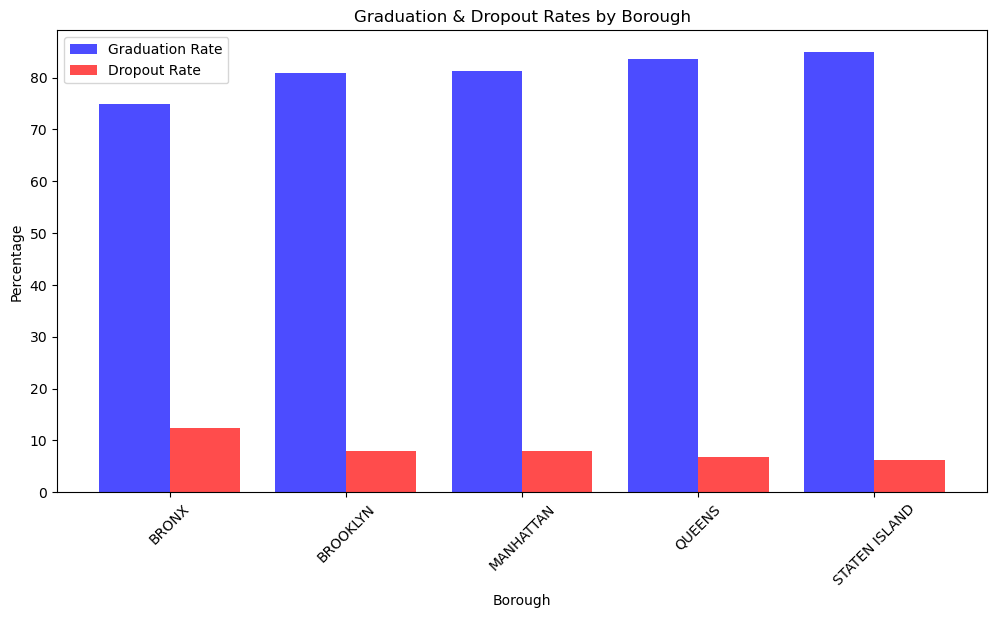

In [ ]:
plt.figure(figsize=(12, 6))
plt.bar(x - width/2, merged_data["Avg Graduation Rate (%)"], width, label="Graduation Rate", color="blue", alpha=0.7)
plt.bar(x + width/2, merged_data["Avg Dropout Rate (%)"], width, label="Dropout Rate", color="red", alpha=0.7)
plt.xlabel("Borough")
plt.ylabel("Percentage")
plt.title("Graduation & Dropout Rates by Borough")
plt.xticks(ticks=x, labels=boroughs, rotation=45)
plt.legend()
plt.show()

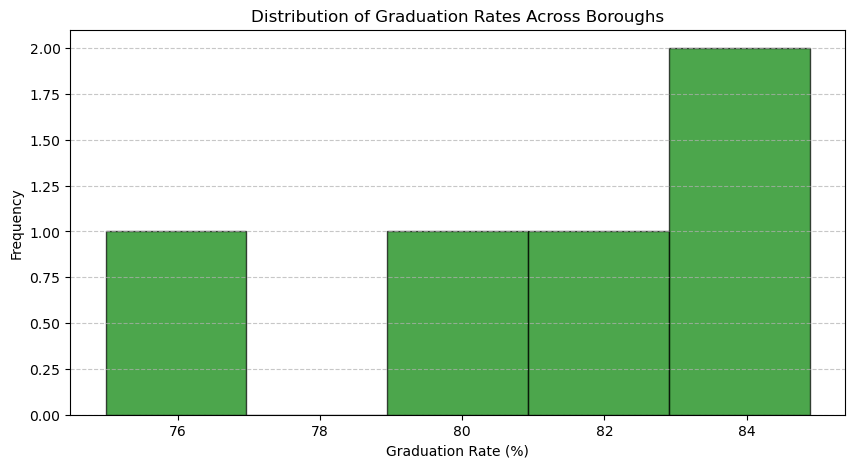

In [ ]:
plt.figure(figsize=(10, 5))
plt.hist(merged_data["Avg Graduation Rate (%)"], bins=5, color="green", alpha=0.7, edgecolor="black")
plt.xlabel("Graduation Rate (%)")
plt.ylabel("Frequency")
plt.title("Distribution of Graduation Rates Across Boroughs")
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()

In [ ]:
print(merged_data.columns)

Index(['Borough', 'Avg Graduation Rate (%)', 'Avg Dropout Rate (%)',
       '% Door-To-Door Service', '% Stop-To-School Service',
       '% Metrocard Service', '% Mid-Day Service', '% D2D Late-Day Programs',
       '% S2S Late-Day Programs'],
      dtype='object')


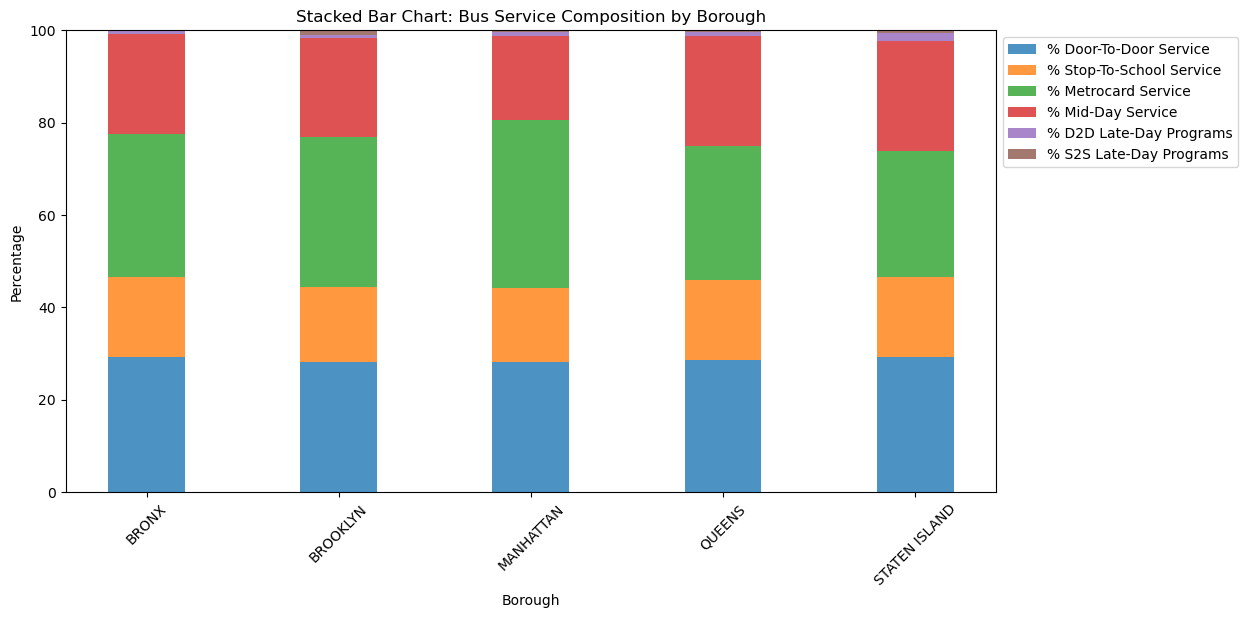

In [ ]:
services = [
    "% Door-To-Door Service",
    "% Stop-To-School Service",
    "% Metrocard Service",
    "% Mid-Day Service",
    "% D2D Late-Day Programs",
    "% S2S Late-Day Programs"
]

# Sum total percentages per borough
totals = merged_data[services].sum(axis=1)

# Normalize each service column so that the sum across services per borough is 100
normalized_data = merged_data[services].div(totals, axis=0) * 100

fig, ax = plt.subplots(figsize=(12, 6))
bottom_values = np.zeros(len(boroughs))

for service in services:
    plt.bar(boroughs, normalized_data[service], width, label=service, bottom=bottom_values, alpha=0.8)
    bottom_values += normalized_data[service].values

plt.xlabel("Borough")
plt.ylabel("Percentage")
plt.title("Stacked Bar Chart: Bus Service Composition by Borough")
plt.xticks(rotation=45)
plt.ylim(0, 100)
plt.legend(loc="upper left", bbox_to_anchor=(1, 1))
plt.show()

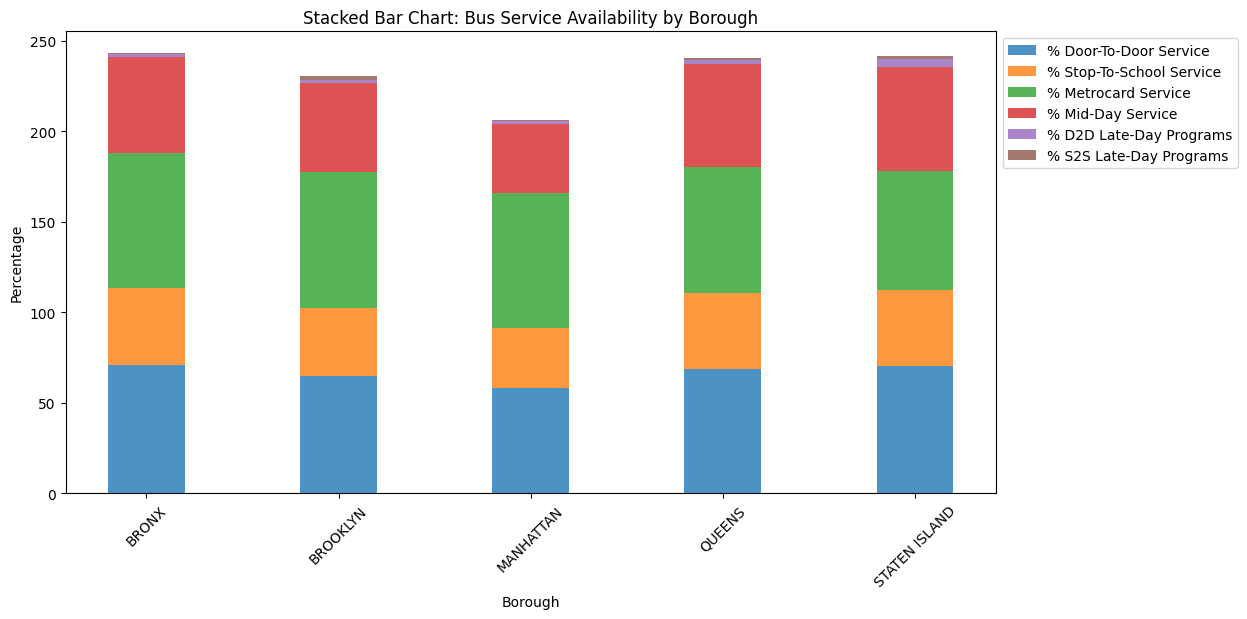

In [ ]:
services = [
    "% Door-To-Door Service",
    "% Stop-To-School Service",
    "% Metrocard Service",
    "% Mid-Day Service",
    "% D2D Late-Day Programs",
    "% S2S Late-Day Programs"
]

fig, ax = plt.subplots(figsize=(12, 6))
bottom_values = np.zeros(len(boroughs))

for service in services:
    plt.bar(boroughs, merged_data[service], width, label=service, bottom=bottom_values, alpha=0.8)
    bottom_values += merged_data[service].values
plt.xlabel("Borough")
plt.ylabel("Percentage")
plt.title("Stacked Bar Chart: Bus Service Availability by Borough")
plt.xticks(rotation=45)
plt.legend(loc="upper left", bbox_to_anchor=(1, 1))
plt.show()

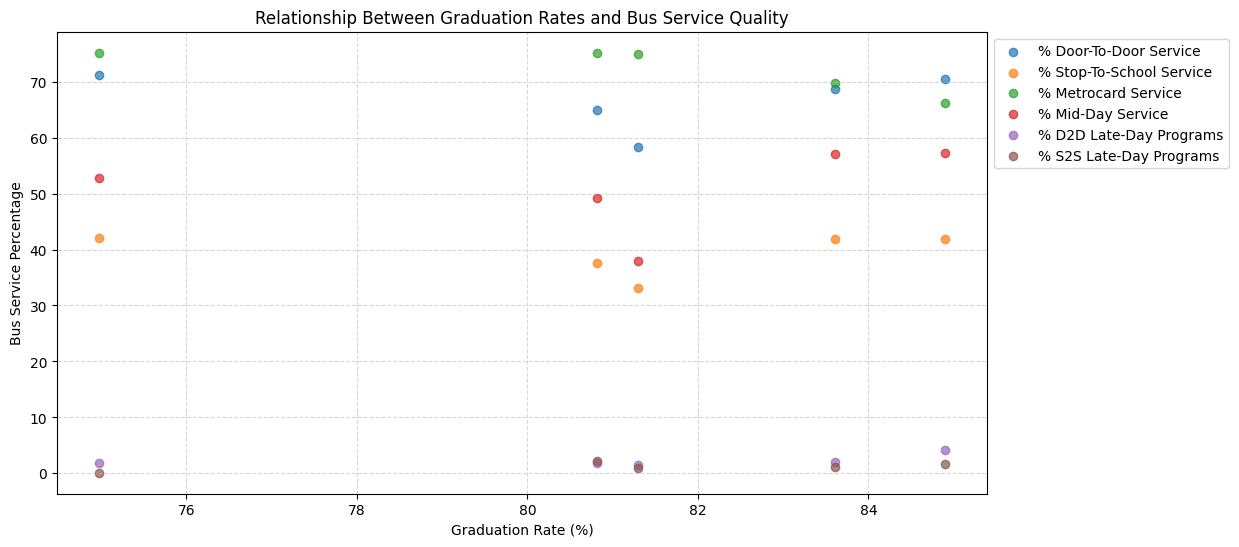

In [ ]:
plt.figure(figsize=(12, 6))
for service in services:
    plt.scatter(merged_data["Avg Graduation Rate (%)"], merged_data[service], label=service, alpha=0.7)

plt.xlabel("Graduation Rate (%)")
plt.ylabel("Bus Service Percentage")
plt.title("Relationship Between Graduation Rates and Bus Service Quality")
plt.legend(loc="upper left", bbox_to_anchor=(1, 1))
plt.grid(True, linestyle="--", alpha=0.5)
plt.show()

In [ ]:
correlation_results = {}

for service in [
    "% Door-To-Door Service",
    "% Stop-To-School Service",
    "% Metrocard Service",
    "% Mid-Day Service",
    "% D2D Late-Day Programs",
    "% S2S Late-Day Programs"
]:
    corr, p_value = pearsonr(merged_data["Avg Graduation Rate (%)"], merged_data[service])
    correlation_results[service] = {"Correlation": corr, "p-value": p_value}


In [ ]:
correlation_df = pd.DataFrame.from_dict(correlation_results, orient="index")
print("\n📊 Correlation Between Graduation Rates and Bus Services:\n")
print(correlation_df)


📊 Correlation Between Graduation Rates and Bus Services:

                          Correlation   p-value
% Door-To-Door Service      -0.114488  0.854548
% Stop-To-School Service    -0.026446  0.966332
% Metrocard Service         -0.751532  0.143005
% Mid-Day Service            0.214590  0.728888
% D2D Late-Day Programs      0.531581  0.356556
% S2S Late-Day Programs      0.636847  0.247895


In [ ]:
numeric_data = merged_data.drop(columns=["Borough"])


correlation_matrix = numeric_data.corr()

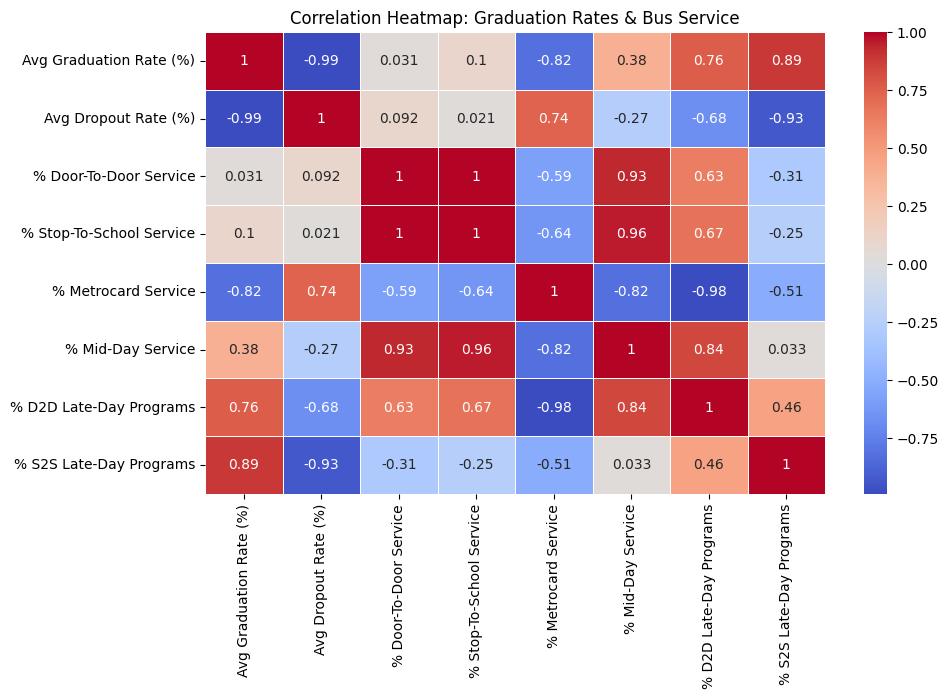

In [ ]:
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix.corr(), annot=True, cmap="coolwarm", linewidths=0.5)
plt.title("Correlation Heatmap: Graduation Rates & Bus Service")
plt.show()


📈 Linear Regression: Predicting Graduation Rate using % Door-To-Door Service
Equation: Graduation Rate = -0.08 * (% Door-To-Door Service) + 86.63
R-Squared Value: 0.013 (Explains 1.3% of variation)
P-Value: 0.85455 (Significance Level)


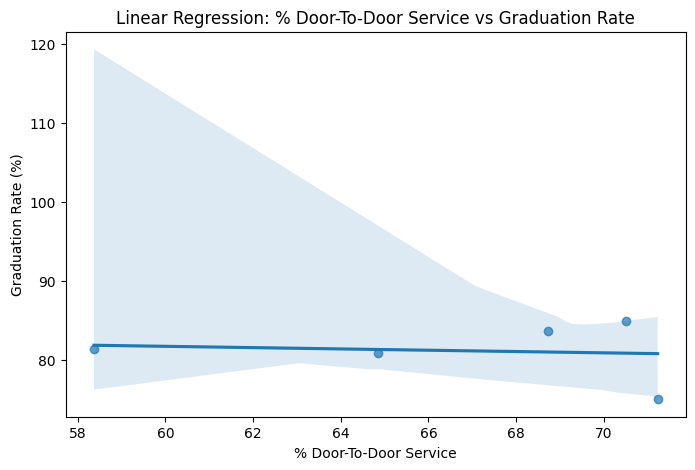


📈 Linear Regression: Predicting Graduation Rate using % Stop-To-School Service
Equation: Graduation Rate = -0.03 * (% Stop-To-School Service) + 82.11
R-Squared Value: 0.001 (Explains 0.1% of variation)
P-Value: 0.96633 (Significance Level)


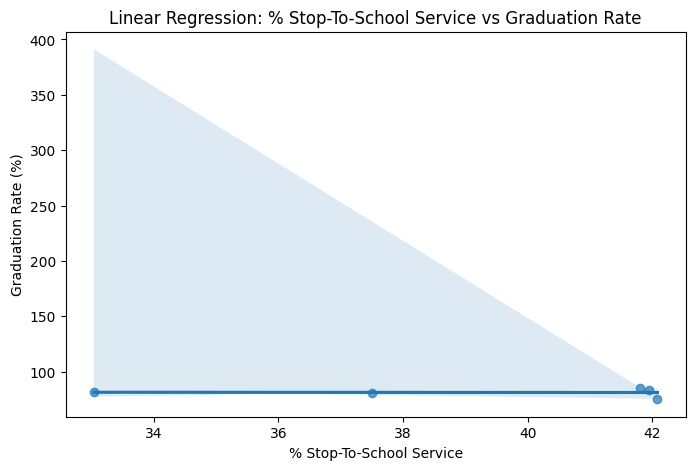


📈 Linear Regression: Predicting Graduation Rate using % Metrocard Service
Equation: Graduation Rate = -0.70 * (% Metrocard Service) + 131.56
R-Squared Value: 0.565 (Explains 56.5% of variation)
P-Value: 0.14301 (Significance Level)


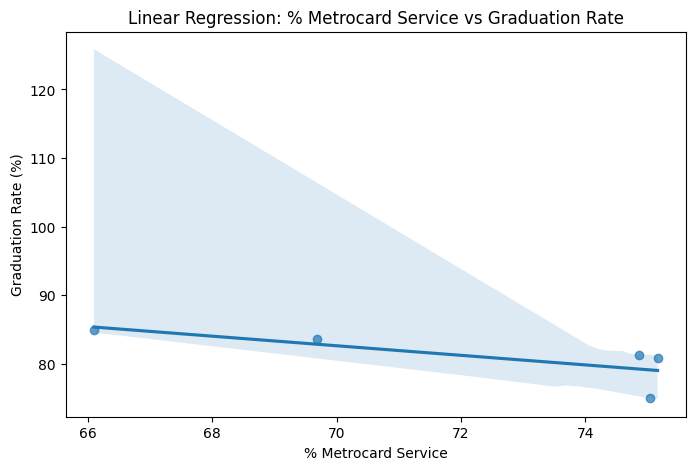


📈 Linear Regression: Predicting Graduation Rate using % Mid-Day Service
Equation: Graduation Rate = 0.10 * (% Mid-Day Service) + 75.89
R-Squared Value: 0.046 (Explains 4.6% of variation)
P-Value: 0.72889 (Significance Level)


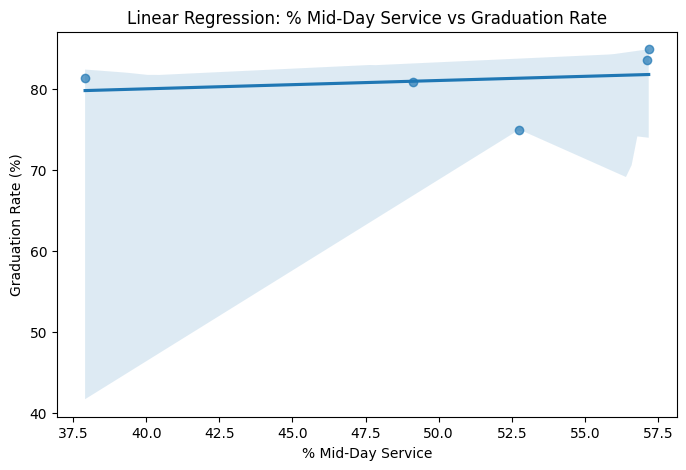


📈 Linear Regression: Predicting Graduation Rate using % D2D Late-Day Programs
Equation: Graduation Rate = 1.80 * (% D2D Late-Day Programs) + 77.02
R-Squared Value: 0.283 (Explains 28.3% of variation)
P-Value: 0.35656 (Significance Level)


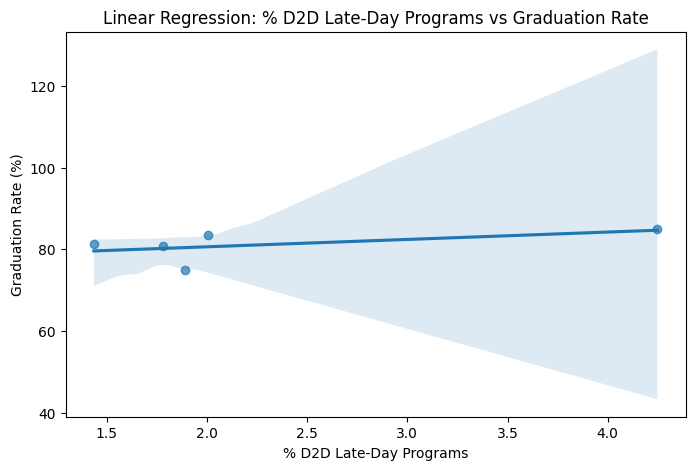


📈 Linear Regression: Predicting Graduation Rate using % S2S Late-Day Programs
Equation: Graduation Rate = 3.12 * (% S2S Late-Day Programs) + 77.41
R-Squared Value: 0.406 (Explains 40.6% of variation)
P-Value: 0.24789 (Significance Level)


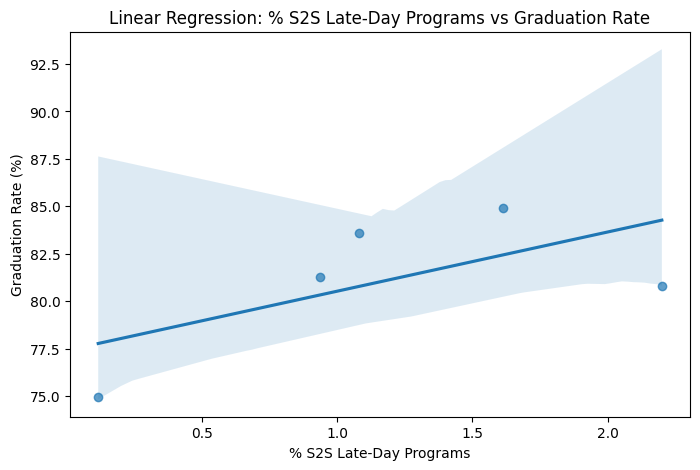

In [ ]:
for service in [
    "% Door-To-Door Service",
    "% Stop-To-School Service",
    "% Metrocard Service",
    "% Mid-Day Service",
    "% D2D Late-Day Programs",
    "% S2S Late-Day Programs"
]:
    slope, intercept, r_value, p_value, std_err = linregress(merged_data[service], merged_data["Avg Graduation Rate (%)"])

    print(f"\n📈 Linear Regression: Predicting Graduation Rate using {service}")
    print(f"Equation: Graduation Rate = {slope:.2f} * ({service}) + {intercept:.2f}")
    print(f"R-Squared Value: {r_value**2:.3f} (Explains {r_value**2*100:.1f}% of variation)")
    print(f"P-Value: {p_value:.5f} (Significance Level)")

    # Scatter plot with regression line
    plt.figure(figsize=(8, 5))
    sns.regplot(x=merged_data[service], y=merged_data["Avg Graduation Rate (%)"], scatter_kws={"alpha": 0.7})
    plt.xlabel(service)
    plt.ylabel("Graduation Rate (%)")
    plt.title(f"Linear Regression: {service} vs Graduation Rate")
    plt.show()